# Ejemplo de descarga, generación de imagen y predicción del modelo con los datos pertinentes:

Para ejecutar esta demo clona el repositorio en una capeta local, las funciones pertinentes están
definidas en la carpeta Codigo


## Descarga de los datos meteorológicos 

Los datos meteorológicos se descargan de la [API de PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/en/#TMY). El Procedimiento resumido es el siguiente: 
- Se descarga la información de los municipios de la España peninsular de [Opendatasoft](https://public.opendatasoft.com/explore/dataset/georef-spain-municipio/table/?disjunctive.acom_code&disjunctive.acom_name&disjunctive.prov_code&disjunctive.prov_name&disjunctive.mun_code&disjunctive.mun_name) en la carpeta [Datos](../Datos)
- De cada municipio se obtiene latitud y longitud y se descarga de la  [API de PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/en/#TMY) en archivos .json de hasta 100 municipios en la capeta Datos/Salida extraccion tiempo
- Cada archivo .json se procesa para agrupar la información por mes en archivos datos_mes_año.csv en la carpeta Datos/Salida tratamiento tiempo

### Descargamos los datos de posición de los municipios de España

Descargamos y guardamos los datos de los municipios de la España peninsular en un dataFrame, para esta demo vamos a tratar 10 municipios al azar

In [2]:
from Codigo.Datos_metereologicos.extraccion_coordenadas import descargar_municipios_df

archivo_fronteras_de_municipios= 'Datos/coordenadas_municipios.csv'
df_fronteras_de_municipios= descargar_municipios_df(archivo_fronteras_de_municipios)
df_fronteras_de_municipios_sample=df_fronteras_de_municipios.sample(10).reset_index(drop=True)
df_fronteras_de_municipios_sample.head(2)

,Geo Point,Geo Shape,Year,Official Code Autonomous Community,Official Name Autonomous Community,Official Code Province,Official Name Province,Official Code Municipality,Official Name Municipality,Iso 3166-3 Area Code,Type,Local Name Municipality
0,"41.606713713306384, -1.6992361120946844","[[[-1.729927236, 41.61408736706315], [-1.72879...",2022,2,Aragón,50,Zaragoza,50198,Oseja,ESP,municipality,NaN
1,"41.72156039353567, 1.506121524762572","[[[1.452513437, 41.7092128280628], [1.45404954...",2022,9,Cataluña,8,Barcelona,8031,Calaf,ESP,municipality,NaN


### Descargamos y guardamos los datos de los 10 municipios en un json 

In [3]:
from Codigo.Datos_metereologicos.extraccion_tiempo import descargar_json_municipios

carpeta_datos_descargados='Datos/Salida extraccion tiempo'
list_json_generados_en_descarga=descargar_json_municipios(df_fronteras_de_municipios_sample,carpeta_datos_descargados)
json_descargado_para_demo=list_json_generados_en_descarga[0]
print("\n El archivo usado en la demo se encuentra en "+json_descargado_para_demo)

Descargando datos de Municipios:   0%|          | 0/10 [00:00<?, ?it/s]

Descargando datos de Municipios: 100%|██████████| 10/10 [00:59<00:00,  5.97s/it]


Datos de 0-10 obtenidos.

 El archivo usado en la demo se encuentra en Datos/Salida extraccion tiempo\irradianciaMunicipio0-10.json


#### Los datos guardados son:

In [4]:
import pandas as pd
df_json_example=pd.read_json(json_descargado_para_demo).head(1)
df_json_example

,Geo Point,Official Name Municipality,Official Code Municipality,Irradiancia
0,"41.606713713306384, -1.6992361120946844",Oseja,50198,"[{""time"":""20150101:0010"",""G(i)"":0.0,""H_sun"":0...."


Mientras que los descargados son (Info en la [página de PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/en/#TMY))

In [5]:
pd.read_json(df_json_example.at[0,'Irradiancia']).sample(5)

,time,G(i),H_sun,T2m,WS10m,Int
33846,20181111:0610,0.00,0.00,10.50,2.34,0
38409,20190520:0910,779.00,47.63,11.17,2.07,0
48421,20200710:1310,955.01,67.09,26.14,2.41,0
22211,20170714:1110,959.01,66.19,24.96,3.66,0
37663,20190419:0710,54.00,19.36,7.82,1.86,0


### Procesamos el archivo para trasponer los datos descargados

En este algoritmo se genera un archivo por cada mes que contiene los datos relevantes para pintar y 
se dan ordenados. Además se filtran solo por datos diurnos.

In [6]:
from Codigo.Datos_metereologicos.tratamiento_tiempo import procesar_archivo, ordenar_directorio_por_fecha
import os
carpeta_datos_tratados='Datos/Salida tratamiento tiempo'

#la carpeta donde se generan los csv debe estar vacía puesto que el programa agrega líneas a documentos ya existentes previamente
if os.path.isdir(carpeta_datos_tratados):
    files=os.listdir(carpeta_datos_tratados)
    for file in files:
        os.remove(os.path.join(carpeta_datos_tratados,file))

#creamos los archivos datos_año_mes.csv en el output_path procesando el json archivo que acabamos de crear
procesar_archivo(json_descargado_para_demo, carpeta_datos_tratados)

#ordenamos por fecha los archivos creados para generar las imágenes de manera eficiente
ordenar_directorio_por_fecha(carpeta_datos_tratados)

Procesando archivos json: 100%|██████████| 10/10 [07:07<00:00, 42.79s/it]

Datos/Salida extraccion tiempo\irradianciaMunicipio0-10.json Procesado


Una muestra de la salida es la siguiente. En la columna id se muestra el código que distingue cada municipio

In [7]:
import os
import random

archivo_de_muestra=os.listdir(carpeta_datos_tratados)[random.randint(0, 71)]
df_tratado=pd.read_csv(os.path.join(carpeta_datos_tratados,archivo_de_muestra))
df_tratado.sample(3)

,fecha,G(i),H_sun,T2m,WS10m,id
2973,2019-05-20 19:10:00+02:00,208.00,22.22,18.43,1.31,46201
3944,2019-05-27 11:10:00+02:00,720.00,47.02,14.97,2.07,40224
3682,2019-05-25 15:10:00+02:00,966.01,66.54,22.84,4.83,19024


# Generación de las imágenes para pintar los datos por municipio usando matplotlib

En este apartado generamos las imágenes con los datos codificados de Irradiancia, Temperatura y altura
del sol para cada hora de los datos obtenidos en el apartado anterior.

## Primero generamos la imagen con los polígonos municipio pero apagados

Municipios pintados: 100%|██████████| 8060/8060 [05:17<00:00, 25.42it/s]


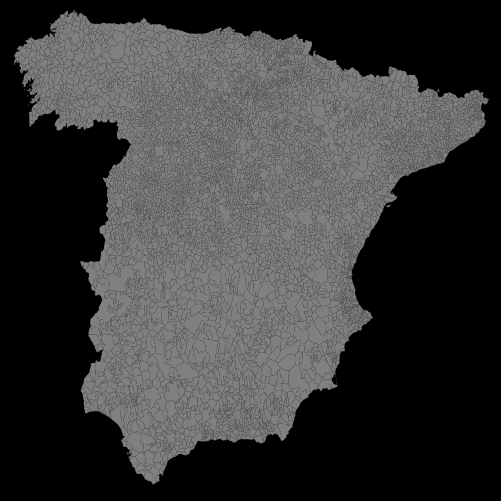

In [8]:
from Codigo.Datos_metereologicos.crear_imagenes import pintar_vacio

fig,dic_poligonos_municipios=pintar_vacio(df_fronteras_de_municipios,512,512)


## Después modificamos los municipios en gris a sus nuevos colores

Para ello  buscamos todos los datos en un intervalo de una hora que están guardados en el archivo correspondiente al archivo_de_muestra guardado en el DataFrame df_tratado más arriba 

Se cogen los datos desde las 2019-05-03 11:00:00+02:00 hasta las 2019-05-03 12:00:00+02:00


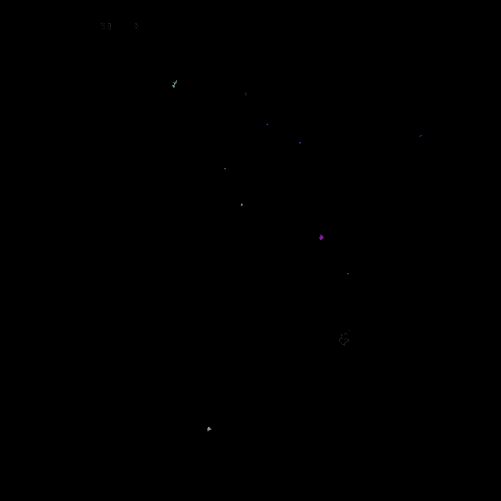

In [9]:
from Codigo.Datos_metereologicos.crear_imagenes import buscar_datos_por_hora, pintar_irradiancia

hora_inicial=df_tratado.sample(1).reset_index().at[0,'fecha']
df_datos_a_cambiar=buscar_datos_por_hora(hora_inicial,df_tratado)
pintar_irradiancia(dic_poligonos_municipios, df_datos_a_cambiar)
display(fig)

Los datos de muestra son muy pequeños, por eso se proporciona el archivo tratado correspondiente a un dia de Mayo de  2018 en la carpeta
[Datos\Salida_5-6_mayo_2018\datos_2018_5.csv](Datos\Salida_5-6_mayo_2018\datos_2018_5.csv)

Los datos completos procesados por el algoritmo anterior están disponibles en la carpeta [Monthly-weather-data-2015-2020 del proyecto de Kaggle](https://www.kaggle.com/datasets/kagglemolamogollonv/hourly-weather-data-by-municipality-in-spain?select=Montly-wheather-data-2015-2020) 

Para hacer la generación completa del dataset de imágenes descarga el contenido completo de la carpeta en 'Datos/Salida tratamiento tiempo' y cambia carpeta_datos_mayo por carpeta_datos_tratados en la siguiente celda (No recomendado para la demo, lleva varias horas de ejecución y es recomendable paralelizar el proceso)

## Generamos todas las imágenes en archivos.png

In [10]:
# escoger una hora y  fecha al azar
from Codigo.Datos_metereologicos.crear_imagenes import pintar_horas_archivo
import os

carpeta_datos_mayo='Datos/Salida_5-6_mayo_2018'
carpeta_a_tratar=carpeta_datos_mayo
archivos_a_pintar=sorted(os.listdir(carpeta_a_tratar))

carpeta_de_imagenes='Datos/Imagenes_generadas'

for file in archivos_a_pintar:
    if file.endswith('.csv'):
        path_archivo=os.path.join(carpeta_a_tratar,file)
        pintar_horas_archivo(path_archivo,
                            carpeta_de_imagenes,
                            dic_poligonos_municipios,
                            fig)

Creando imágenes de Datos/Salida_5-6_mayo_2018\datos_2018_5.csv:   0%| | 0/15.0 

Creando imágenes de Datos/Salida_5-6_mayo_2018\datos_2018_5.csv: 100%|█| 15/15.0


Las imágenes se generan en una carpeta específica para cada mes y año dentro del directorio Datos/Imagenes_generada

# Predicción del modelo de CNN

En este apartado vamos a utilizar el modelo preentrenado con la red generada en Codigo\Modelo CNN\cnn_modelo_reducido.ipynb y entrenada sobre todo el dataset


### Elegimos una imagen de las generadas al azar

2018-05-05 150000.png


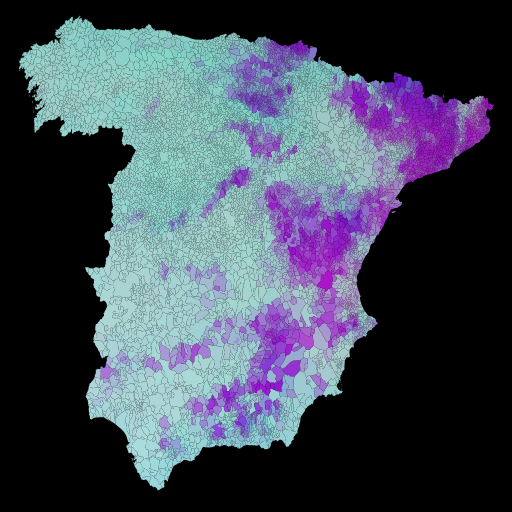

In [11]:
import  random
import os

folder_mes_año=random.choice(os.listdir(carpeta_de_imagenes))
folder_mes_año=os.path.join(carpeta_de_imagenes,folder_mes_año)
foto_de_hora=random.choice(os.listdir(folder_mes_año))
foto_de_hora_path=os.path.join(folder_mes_año,foto_de_hora)

print(foto_de_hora)
from IPython.display import Image 
Image(filename=foto_de_hora_path)

Tomamos el mes y el año del nombre de la imagen


In [12]:
fecha_hora_prediccion=pd.to_datetime(foto_de_hora.split('.')[0]).tz_localize('Europe/Madrid')
fecha_hora_prediccion

Timestamp('2018-05-05 15:00:00+0200', tz='Europe/Madrid')

### Cargamos la potencia instalada de red electica en esa fecha


In [14]:
csv_potencia_instalada='Datos/Potencia instalada Red Electrica/potencia_instalada.csv'
# month and year are formatted as
search_key= str(fecha_hora_prediccion.month).zfill(2)+'/'+str(fecha_hora_prediccion.year)

#carga de datos
potencia_instalada=pd.read_csv(csv_potencia_instalada, sep=';',header=None)
potencia_instalada=potencia_instalada.set_index(0).transpose()

#busqueda
row=potencia_instalada.loc[potencia_instalada['potencia_fecha']==search_key]
potencia_instalada=row.reset_index().at[0,'potencia_solar_fotovoltaica']
potencia_instalada=float(potencia_instalada)
print("La potencia fotovoltaica instalada a "+search_key+" es de %4.3f MW" %potencia_instalada)

La potencia fotovoltaica instalada a 05/2018 es de 4710.626 MW


# Cargamos el modelo preentrenado y la imagen

por cuestiones de carga de memoria usamos solo el modelo reducido de 128x128 como input
Tanto este como el modelo para 256x256 está disponible en la carpeta [modelo preentrenado del proyecto de Kaggle](https://www.kaggle.com/datasets/kagglemolamogollonv/hourly-weather-data-by-municipality-in-spain?select=modelo_preentrenado) 

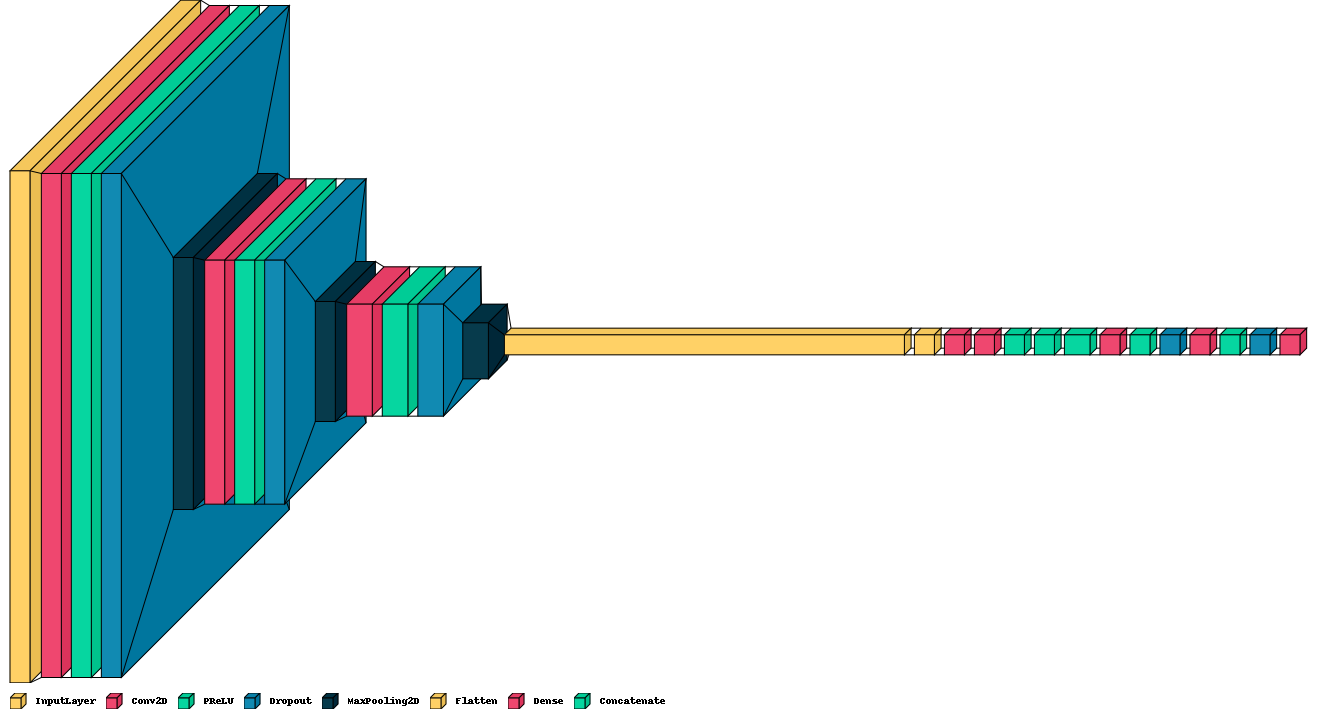

In [16]:
import tensorflow as tf
import visualkeras

path_modelo='Codigo/ModeloCNN/modelo_preentrenado/modelo_reducido_input_128.h5'
modelo_reducido=tf.keras.models.load_model(path_modelo)
visualkeras.layered_view(modelo_reducido, legend=True)

In [17]:
from Codigo.ModeloCNN.prediccion_modelo import create_input
input_data=create_input(foto_de_hora_path,potencia_instalada)
prediccion=modelo_reducido.predict(input_data)
prediccion

1/1 [==============================] - 0s 476ms/step


array([[3.64078760e-01, 1.33542938e+02, 5.09403152e+01, 4.01039314e+01,
        1.73438594e-01, 2.44578979e+02, 3.88135719e+01, 1.75826283e+01,
        6.34726167e-01, 2.01738625e+01, 1.25283180e+02, 1.14377991e+02,
        1.52662567e+02, 4.54552917e+01, 1.08890427e+02, 9.27919865e+00,
        5.28327942e+01, 1.94471188e+01, 2.29789424e+00, 4.64786072e+01,
        1.87650433e+01, 5.08995972e+01, 4.73279991e+01, 2.58728027e+01,
        4.21932907e+01, 2.32333279e+00, 2.87451706e+01, 2.10677917e+02,
        2.70087795e+01, 1.00327385e+02, 1.30147171e+00, 1.87345104e+01,
        8.66429925e-01, 3.86714897e+01, 1.55186062e+01, 1.76307236e+02,
        1.15755682e+01, 1.78955116e+01, 1.58640671e+01, 1.13068947e+02,
        6.29339371e+01, 9.21539307e+01, 1.46687293e+00, 5.06614380e+01,
        7.64828033e+01, 7.56271982e+00, 4.14160652e+01]], dtype=float32)

## Compararemos los resultados con los datos obtenidos de Red Eléctrica

para ello cargamos los datos directamente del archivo procesado cuya extracción se ha hecho con 
un algoritmo de scrapping y está disponible en 
Codigo/Produccion Red Electrica/Extraccion produccion/extraccion_produccion.py

El archivo completo está disponible en el archivo [solar_power_production_by_province_and_hour_2015-2022.csv proyecto de Kaggle](https://www.kaggle.com/datasets/kagglemolamogollonv/hourly-weather-data-by-municipality-in-spain?select=solar_power_production_by_province_and_hour_2015-2022.csv)

array([<Axes: title={'center': 'Producción real (MWh)'}, xlabel='Provincia'>,
       <Axes: title={'center': 'Producción estimada (MWh)'}, xlabel='Provincia'>],
      dtype=object)

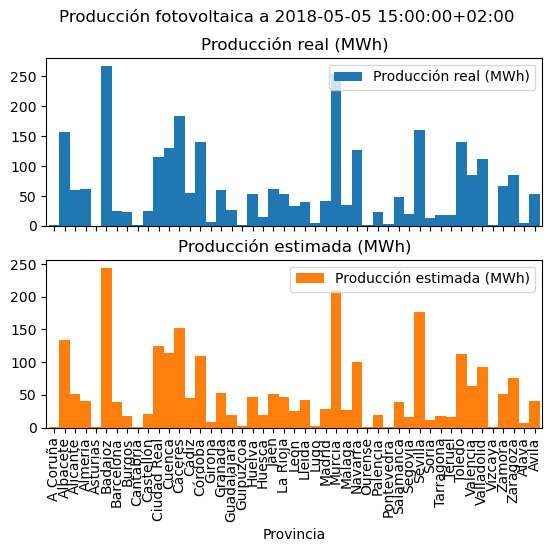

In [18]:
json_produccion='Datos/produccion_por_provincia_y_fecha.json'
#cargamos el archivo
df_produccion_por_provincia=pd.read_json(json_produccion)

#hacemos_la_consulta
df_produccion_por_provincia['fecha_produccion']=pd.to_datetime(df_produccion_por_provincia['fecha_produccion'])
produccion_real=df_produccion_por_provincia.loc[df_produccion_por_provincia['fecha_produccion']==fecha_hora_prediccion]
produccion_real,nombre_provincias=produccion_real.reset_index().iloc[0][['produccion','provincias']]

df_comparativo= pd.DataFrame( {'Provincia': nombre_provincias,
     'Producción real (MWh)': produccion_real,
     'Producción estimada (MWh)': prediccion[0]
    })

title='Producción fotovoltaica a '+str(fecha_hora_prediccion)
df_comparativo.plot.bar(x='Provincia', width=1, title=title, subplots=True)